In [ ]:
class dnode:
    def __init__(self,data):
        self.data = data
        self.next = None
        self.prev = None
        

In [2]:
class dnode:
    """Node for doubly linked list"""
    def __init__(self, data):
        self.data = data
        self.next = None
        self.prev = None


class DoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
        self.size = 0
    
    def is_empty(self):
        return self.head is None
    
    def __len__(self):
        return self.size
    
    def __iter__(self):
        curr = self.head
        while curr:
            yield curr.data
            curr = curr.next
    
    def __str__(self):
        return " <-> ".join(str(x) for x in self)


    # ===== INSERTIONS =====
    
    def append(self, value):
        """Append to end. O(1)"""
        node = dnode(value)
        if self.is_empty():
            self.head = node
            self.tail = node
        else:
            node.prev = self.tail
            self.tail.next = node
            self.tail = node
        self.size += 1
    
    def prepend(self, value):
        """Insert at beginning. O(1)"""
        node = dnode(value)
        if self.is_empty():
            self.head = node
            self.tail = node
        else:
            node.next = self.head
            self.head.prev = node
            self.head = node
        self.size += 1
    
    def insert_at_pos(self, pos, value):
        """Insert at 0-based index pos. O(n) worst case"""
        if pos < 0 or pos > self.size:
            raise IndexError("Invalid Position")
        
        if pos == 0:
            self.prepend(value)
            return
        
        if pos == self.size:
            self.append(value)
            return
        
        # Choose direction based on position for optimization
        if pos <= self.size // 2:
            curr = self.head
            for _ in range(pos - 1):
                curr = curr.next
        else:
            curr = self.tail
            for _ in range(self.size - pos):
                curr = curr.prev
            curr = curr.prev
        
        node = dnode(value)
        node.next = curr.next
        node.prev = curr
        curr.next.prev = node
        curr.next = node
        self.size += 1


    # ===== DELETIONS =====
    
    def delete_from_beginning(self):
        """Remove head. O(1). Return removed value"""
        if self.is_empty():
            raise IndexError("Delete from empty list")
        
        val = self.head.data
        if self.head.next is None:
            self.head = None
            self.tail = None
        else:
            self.head = self.head.next
            self.head.prev = None
        
        self.size -= 1
        return val
    
    def delete_at_end(self):
        """Remove tail. O(1). Return removed value"""
        if self.is_empty():
            raise IndexError("Delete from empty list")
        
        val = self.tail.data
        if self.tail.prev is None:
            self.head = None
            self.tail = None
        else:
            self.tail = self.tail.prev
            self.tail.next = None
        
        self.size -= 1
        return val
    
    def delete_at_position(self, pos):
        """Delete and return value at position (0-based). O(n)"""
        if pos < 0 or pos >= self.size:
            raise IndexError("Invalid Position")
        
        if pos == 0:
            return self.delete_from_beginning()
        
        if pos == self.size - 1:
            return self.delete_at_end()
        
        # Choose direction for optimization
        if pos <= self.size // 2:
            curr = self.head
            for _ in range(pos):
                curr = curr.next
        else:
            curr = self.tail
            for _ in range(self.size - 1 - pos):
                curr = curr.prev
        
        # curr is the node to delete
        val = curr.data
        curr.prev.next = curr.next
        curr.next.prev = curr.prev
        self.size -= 1
        return val


    # ===== UTILITIES =====
    
    def to_list(self):
        """Return Python list of values. O(n)."""
        return [x for x in self]
    
    @classmethod
    def from_list(cls, values):
        """Alternative constructor - create linked list from Python list"""
        ll = cls()
        for v in values:
            ll.append(v)
        return ll
    
    def search(self, value):
        """Return first index of value or -1 if not found. O(n)."""
        idx = 0
        curr = self.head
        while curr:
            if curr.data == value:
                return idx
            curr = curr.next
            idx += 1
        return -1


In [ ]:
# ===== USAGE EXAMPLES =====

if __name__ == "__main__":
    # Create doubly linked list
    dll = DoublyLinkedList()
    
    # Test append
    dll.append(10)
    dll.append(20)
    dll.append(30)
    print("After append:", dll)  # 10 <-> 20 <-> 30
    
    # Test prepend
    dll.prepend(5)
    print("After prepend:", dll)  # 5 <-> 10 <-> 20 <-> 30
    
    # Test insert at position
    dll.insert_at_pos(2, 15)
    print("After insert at pos 2:", dll)  # 5 <-> 10 <-> 15 <-> 20 <-> 30
    
    # Test length and size
    print("Length:", len(dll))  # 5
    
    # Test from_list
    dll2 = DoublyLinkedList.from_list([100, 200, 300])
    print("From list:", dll2)  # 100 <-> 200 <-> 300
    
    # Test search
    print("Search for 15:", dll.search(15))  # 2
    print("Search for 999:", dll.search(999))  # -1
    
    # Test to_list
    print("To list:", dll.to_list())  # [5, 10, 15, 20, 30]
    
    # Test delete
    print("Delete from beginning:", dll.delete_from_beginning())  # 5
    print("After delete:", dll)  # 10 <-> 15 <-> 20 <-> 30
    
    print("Delete at end:", dll.delete_at_end())  # 30
    print("After delete:", dll)  # 10 <-> 15 <-> 20
    
    print("Delete at pos 1:", dll.delete_at_position(1))  # 15
    print("After delete:", dll)  # 10 <-> 20


After append: 10 <-> 20 <-> 30
After prepend: 5 <-> 10 <-> 20 <-> 30
After insert at pos 2: 5 <-> 10 <-> 15 <-> 20 <-> 30
Length: 5
From list: 100 <-> 200 <-> 300
Search for 15: 2
Search for 999: -1
To list: [5, 10, 15, 20, 30]
Delete from beginning: 5
After delete: 10 <-> 15 <-> 20 <-> 30
Delete at end: 30
After delete: 10 <-> 15 <-> 20
Delete at pos 1: 15
After delete: 10 <-> 20


### `Que:1` `:` `Given two singly linked lists that intersect at some point and become a single linked list, find the intersecting node. The head pointers of both lists are known, but the intersecting node and lengths are not known.`

### `Solution` O(m + n)
`Optimal Algorithm:` Two-Pointer Approach
The most efficient solution uses two pointers traversing both lists alternately.

`Algorithm:`
- `1.` Create two pointers ptr1 and ptr2 starting at head1 and head2 respectively
- `2.` Traverse both lists simultaneously:

            - When ptr1 reaches the end, move it to head2
            - When ptr2 reaches the end, move it to head1

- `3.` The pointers will meet at the intersecting node (if intersection exists)

In [4]:
# Define the ListNode class
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

# Function to find the intersection node
def getIntersectionNode(headA, headB):
    """
    Find intersection node of two linked lists
    Time Complexity: O(m + n)
    Space Complexity: O(1)
    """
    if not headA or not headB:
        return None
    
    ptr1 = headA
    ptr2 = headB
    
    # Traverse both lists until they meet or both become None
    while ptr1 != ptr2:
        ptr1 = ptr1.next if ptr1 else headB
        ptr2 = ptr2.next if ptr2 else headA
    
    return ptr1  # Intersection node or None

# Utility function to print linked list
def print_linked_list(head):
    current = head
    while current:
        print(current.val, end=' -> ' if current.next else '')
        current = current.next
    print()

# Create two linked lists with intersection
# List A: 1 -> 2 -> 3 \
#                      -> 7 -> 8
# List B:       4 -> 5 -> 6 /
#
# Common part: 7 -> 8

# Create nodes for shared part
node7 = ListNode(7)
node8 = ListNode(8)
node7.next = node8

# List A nodes
headA = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(3)
headA.next = node2
node2.next = node3
node3.next = node7  # connecting to shared part

# List B nodes
headB = ListNode(4)
node5 = ListNode(5)
node6 = ListNode(6)
headB.next = node5
node5.next = node6
node6.next = node7  # connecting to shared part

# Print lists
print("Linked List A:")
print_linked_list(headA)
print("Linked List B:")
print_linked_list(headB)

# Find and print intersection node
intersect_node = getIntersectionNode(headA, headB)

if intersect_node:
    print("Intersection Node Value:", intersect_node.val)
else:
    print("No intersection found.")


Linked List A:
1 -> 2 -> 3 -> 7 -> 8
Linked List B:
4 -> 5 -> 6 -> 7 -> 8
Intersection Node Value: 7


### `Que2:` `:` `What is the worst-case time complexity of inserting n elements into an empty linked list, if the linked list needs to be maintained in sorted order?`

### `Solution`
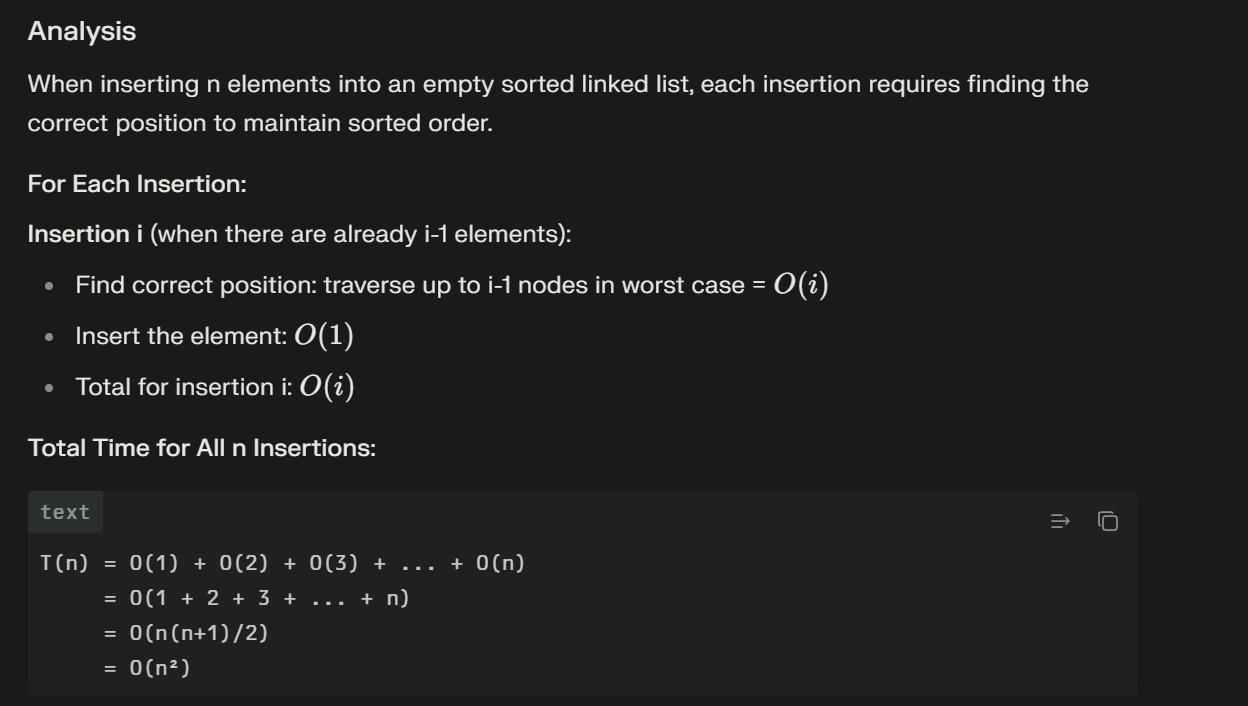

In [7]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
    
    def __repr__(self):
        return f"ListNode({self.val})"


def print_list(head, list_name="List"):
    """Print a linked list"""
    values = []
    curr = head
    while curr:
        values.append(curr.val)
        curr = curr.next
    print(f"{list_name}: {' -> '.join(map(str, values))} -> None")


def insert_sorted(head, val):
    """
    Insert a value into sorted linked list
    Time Complexity: O(n) worst case (search for position)
    Space Complexity: O(1)
    """
    new_node = ListNode(val)
    
    # Case 1: Empty list or insert at beginning
    if not head or head.val >= val:
        new_node.next = head
        return new_node
    
    # Case 2: Find correct position in middle or end
    curr = head
    while curr.next and curr.next.val < val:
        curr = curr.next
    
    new_node.next = curr.next
    curr.next = new_node
    return head


# ===== ANALYSIS WITH STEP-BY-STEP PRINTING =====

def insert_n_elements_analysis(elements):
    """
    Insert n elements into sorted linked list
    Show complexity analysis
    """
    print("=" * 70)
    print("INSERTING n ELEMENTS INTO SORTED LINKED LIST")
    print("=" * 70)
    
    head = None
    total_comparisons = 0
    
    for idx, val in enumerate(elements, 1):
        print(f"\n{'─' * 70}")
        print(f"Insertion {idx}: Inserting value {val}")
        print(f"{'─' * 70}")
        
        # Count comparisons for this insertion
        comparisons = 0
        curr = head
        
        # Simulate finding position
        if not head or head.val >= val:
            comparisons = 1
            print(f"  → Insert at beginning (comparisons: {comparisons})")
        else:
            while curr.next and curr.next.val < val:
                comparisons += 1
                curr = curr.next
            comparisons += 1  # Final comparison
            print(f"  → Insert at position (comparisons: {comparisons})")
        
        total_comparisons += comparisons
        
        # Perform insertion
        head = insert_sorted(head, val)
        
        print(f"  Current list: ", end="")
        print_list(head)
        print(f"  Comparisons for this insertion: {comparisons}")
        print(f"  Total comparisons so far: {total_comparisons}")
    
    return head, total_comparisons


def calculate_theoretical_complexity(n):
    """
    Calculate theoretical worst-case complexity
    """
    print("\n\n" + "=" * 70)
    print("COMPLEXITY ANALYSIS")
    print("=" * 70)
    
    print(f"\nFor inserting {n} elements:")
    print(f"{'─' * 70}")
    print(f"Insertion 1: 1 comparison (1 element in list)")
    print(f"Insertion 2: 2 comparisons (1 element in list, might traverse to end)")
    print(f"Insertion 3: 3 comparisons (2 elements in list)")
    print(f"...")
    print(f"Insertion n: n comparisons (n-1 elements in list)")
    print(f"{'─' * 70}")
    
    print(f"\nTotal comparisons = 1 + 2 + 3 + ... + n")
    print(f"                  = n(n+1)/2")
    print(f"                  = (n² + n)/2")
    print(f"                  = O(n²)")
    
    theoretical = n * (n + 1) // 2
    print(f"\nFor n = {n}:")
    print(f"  Theoretical maximum comparisons = {theoretical}")
    print(f"  Upper bound = O(n²)")


# ===== BEST CASE, AVERAGE CASE, WORST CASE =====

def complexity_scenarios():
    """
    Explain different scenarios
    """
    print("\n\n" + "=" * 70)
    print("SCENARIO ANALYSIS")
    print("=" * 70)
    
    print("\n1. BEST CASE: O(n)")
    print("   - When all elements are inserted in descending order")
    print("   - Each insertion goes at the beginning: O(1) per insertion")
    print("   - Total: n × O(1) = O(n)")
    print("   Example: Insert [5, 4, 3, 2, 1] into sorted list")
    
    print("\n2. AVERAGE CASE: O(n²)")
    print("   - Random insertion order")
    print("   - On average, search completes at middle of list: O(n/2)")
    print("   - Total: sum of O(i) for i=1 to n = O(n²)")
    
    print("\n3. WORST CASE: O(n²)")
    print("   - When elements are inserted in ascending order")
    print("   - Each insertion goes at the end: O(i) comparisons for i-th insertion")
    print("   - Total: 1 + 2 + 3 + ... + n = O(n²)")
    print("   Example: Insert [1, 2, 3, 4, 5] into sorted list")


# ===== COMPARISON WITH ARRAYS =====

def comparison_with_arrays():
    """
    Compare linked list vs array performance
    """
    print("\n\n" + "=" * 70)
    print("LINKED LIST vs ARRAY COMPARISON")
    print("=" * 70)
    
    print(f"\n{'Operation':<25} {'Linked List':<20} {'Sorted Array':<20}")
    print("─" * 70)
    print(f"{'Insert n elements':<25} {'O(n²)':<20} {'O(n²)':<20}")
    print(f"{'(search position):':<25}")
    print(f"\n{'Search':<25} {'O(n)':<20} {'O(log n) binary search':<20}")
    print(f"\n{'Insert at position':<25} {'O(1)':<20} {'O(n) shift required':<20}")
    print(f"\n{'Delete':<25} {'O(n)':<20} {'O(n) shift required':<20}")
    
    print("\nNote: Both have O(n²) for inserting n elements in sorted order")
    print("      because finding position dominates the complexity")


# ===== MAIN EXECUTION =====

if __name__ == "__main__":
    # Example: Insert elements in ascending order (worst case)
    elements = [3, 1, 4, 1, 5, 9, 2, 6]
    
    head, total_comps = insert_n_elements_analysis(elements)
    
    calculate_theoretical_complexity(len(elements))
    
    complexity_scenarios()
    
    comparison_with_arrays()
    
    print("\n\n" + "=" * 70)
    print("ANSWER TO GATE 2020 CS 1")
    print("=" * 70)
    print("\n✓ Worst-case time complexity: O(n²)")
    print("\n  Reason: Finding correct position for each element")
    print("          requires O(i) comparisons for i-th insertion")
    print("          Total: 1 + 2 + 3 + ... + n = n(n+1)/2 = O(n²)")
    print("=" * 70 + "\n")


INSERTING n ELEMENTS INTO SORTED LINKED LIST

──────────────────────────────────────────────────────────────────────
Insertion 1: Inserting value 3
──────────────────────────────────────────────────────────────────────
  → Insert at beginning (comparisons: 1)
  Current list: List: 3 -> None
  Comparisons for this insertion: 1
  Total comparisons so far: 1

──────────────────────────────────────────────────────────────────────
Insertion 2: Inserting value 1
──────────────────────────────────────────────────────────────────────
  → Insert at beginning (comparisons: 1)
  Current list: List: 1 -> 3 -> None
  Comparisons for this insertion: 1
  Total comparisons so far: 2

──────────────────────────────────────────────────────────────────────
Insertion 3: Inserting value 4
──────────────────────────────────────────────────────────────────────
  → Insert at position (comparisons: 2)
  Current list: List: 1 -> 3 -> 4 -> None
  Comparisons for this insertion: 2
  Total comparisons so far: 4

─

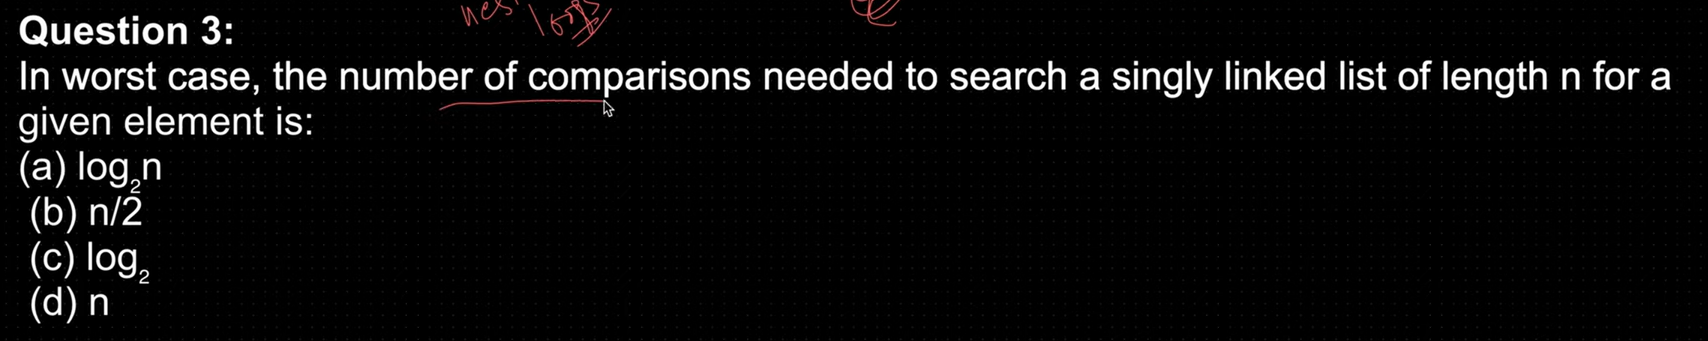

### `Soltion:`
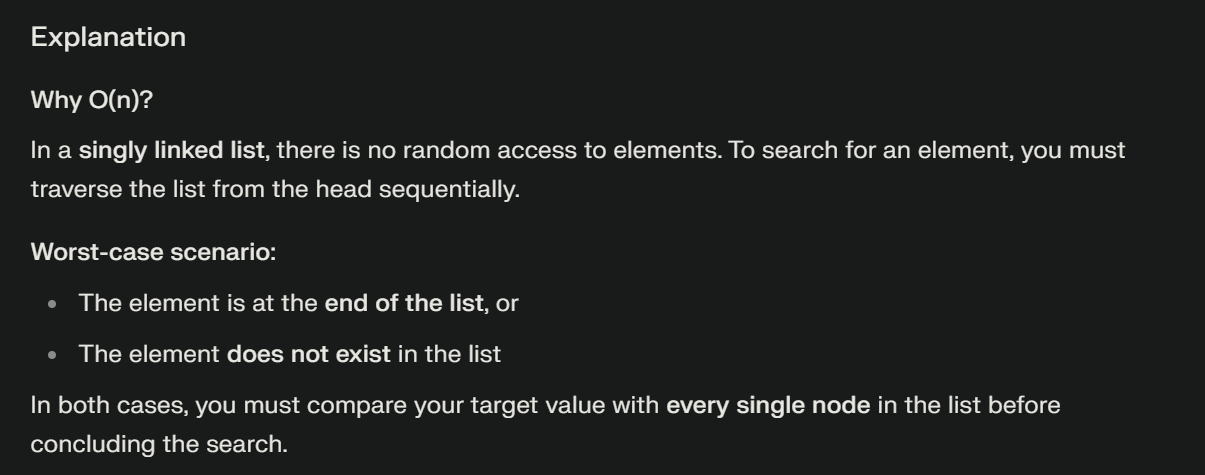
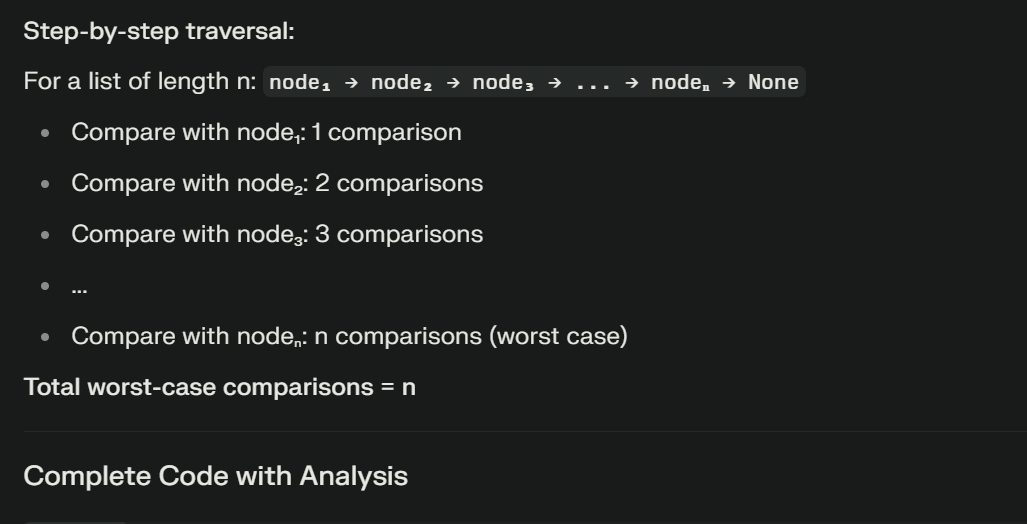

In [8]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
    
    def __repr__(self):
        return f"ListNode({self.val})"


def print_list(head, list_name="List"):
    """Print a linked list"""
    values = []
    curr = head
    while curr:
        values.append(curr.val)
        curr = curr.next
    print(f"{list_name}: {' -> '.join(map(str, values))} -> None")


def search_linked_list(head, target, show_steps=True):
    """
    Search for target element in singly linked list
    Returns: (found, comparisons, position)
    """
    curr = head
    comparisons = 0
    position = 0
    
    if show_steps:
        print(f"\nSearching for {target}:")
        print("─" * 60)
    
    while curr:
        comparisons += 1
        if show_steps:
            print(f"  Step {comparisons}: Compare {target} with {curr.val}", end="")
        
        if curr.val == target:
            if show_steps:
                print(f" ✓ FOUND at position {position}")
            return True, comparisons, position
        else:
            if show_steps:
                print(f" ✗ Not equal")
        
        curr = curr.next
        position += 1
    
    if show_steps:
        print(f"  Element not found. Total comparisons: {comparisons}")
    
    return False, comparisons, -1


# ===== TEST CASES =====

def test_search_worst_case():
    """
    Demonstrate worst-case scenarios
    """
    print("=" * 70)
    print("SEARCHING IN SINGLY LINKED LIST - WORST-CASE ANALYSIS")
    print("=" * 70)
    
    # Create a linked list: 10 -> 20 -> 30 -> 40 -> 50 -> None
    head = ListNode(10)
    head.next = ListNode(20)
    head.next.next = ListNode(30)
    head.next.next.next = ListNode(40)
    head.next.next.next.next = ListNode(50)
    
    print("\nLinked List created:")
    print_list(head)
    
    list_length = 5
    print(f"\nList length (n) = {list_length}")
    
    
    # ===== CASE 1: Element at beginning =====
    print("\n" + "─" * 70)
    print("CASE 1: Element at BEGINNING (Best case)")
    print("─" * 70)
    found, comps, pos = search_linked_list(head, 10)
    print(f"Result: Found = {found}, Comparisons = {comps}, Position = {pos}")
    print(f"Complexity: O(1) - Only 1 comparison needed")
    
    
    # ===== CASE 2: Element in middle =====
    print("\n" + "─" * 70)
    print("CASE 2: Element in MIDDLE (Average case)")
    print("─" * 70)
    found, comps, pos = search_linked_list(head, 30)
    print(f"Result: Found = {found}, Comparisons = {comps}, Position = {pos}")
    print(f"Complexity: O(n/2) on average")
    
    
    # ===== CASE 3: Element at end (WORST CASE) =====
    print("\n" + "─" * 70)
    print("CASE 3: Element at END (Worst case)")
    print("─" * 70)
    found, comps, pos = search_linked_list(head, 50)
    print(f"Result: Found = {found}, Comparisons = {comps}, Position = {pos}")
    print(f"Complexity: O(n) - {comps} comparisons for list of length {list_length}")
    
    
    # ===== CASE 4: Element not in list (WORST CASE) =====
    print("\n" + "─" * 70)
    print("CASE 4: Element NOT IN LIST (Worst case)")
    print("─" * 70)
    found, comps, pos = search_linked_list(head, 100)
    print(f"Result: Found = {found}, Comparisons = {comps}, Position = {pos}")
    print(f"Complexity: O(n) - Must traverse entire list to confirm absence")
    
    
    # ===== COMPARISON TABLE =====
    print("\n\n" + "=" * 70)
    print("COMPARISON: BEST, AVERAGE, WORST CASE")
    print("=" * 70)
    
    print(f"\n{'Scenario':<30} {'Comparisons':<20} {'Complexity':<20}")
    print("─" * 70)
    print(f"{'Element at beginning':<30} {'1':<20} {'O(1)':<20}")
    print(f"{'Element in middle':<30} {'n/2':<20} {'O(n/2) = O(n)':<20}")
    print(f"{'Element at end':<30} {'n':<20} {'O(n)':<20}")
    print(f"{'Element not found':<30} {'n':<20} {'O(n)':<20}")
    print("─" * 70)
    print(f"{'WORST-CASE ANSWER':<30} {'n':<20} {'O(n)':<20}")


# ===== COMPARISON: LINKED LIST vs ARRAY vs BINARY SEARCH TREE =====

def comparison_data_structures():
    """
    Compare search complexity across different data structures
    """
    print("\n\n" + "=" * 70)
    print("DATA STRUCTURE SEARCH COMPARISON")
    print("=" * 70)
    
    print(f"\n{'Data Structure':<25} {'Best Case':<20} {'Average':<20} {'Worst Case':<20}")
    print("─" * 85)
    print(f"{'Singly Linked List':<25} {'O(1)':<20} {'O(n)':<20} {'O(n)':<20}")
    print(f"{'Doubly Linked List':<25} {'O(1)':<20} {'O(n/2)':<20} {'O(n)':<20}")
    print(f"{'Unsorted Array':<25} {'O(1)':<20} {'O(n)':<20} {'O(n)':<20}")
    print(f"{'Sorted Array':<25} {'O(1)':<20} {'O(log n)':<20} {'O(log n)':<20}")
    print(f"{'Balanced BST':<25} {'O(1)':<20} {'O(log n)':<20} {'O(log n)':<20}")
    print(f"{'Hash Table':<25} {'O(1)':<20} {'O(1)':<20} {'O(n)':<20}")
    print("─" * 85)
    
    print("\nKey Insight:")
    print("  → Linked lists have no random access, must traverse sequentially")
    print("  → Cannot use binary search (no index-based access)")
    print("  → Worst-case: O(n) comparisons")


# ===== WHY NOT log₂n? =====

def explain_why_not_log_n():
    """
    Explain why log₂n is incorrect
    """
    print("\n\n" + "=" * 70)
    print("WHY NOT log₂n? (Why option (a) is WRONG)")
    print("=" * 70)
    
    print("\nlog₂n complexity applies to:")
    print("  • Binary search on SORTED ARRAY: O(log n)")
    print("  • Balanced Binary Search Tree: O(log n)")
    print("  • Balanced AVL Tree: O(log n)")
    
    print("\nWhy log₂n does NOT apply to linked lists:")
    print("  ✗ Linked lists have NO random access")
    print("  ✗ Cannot divide the list in half (no index)")
    print("  ✗ Must traverse sequentially from head")
    print("  ✗ Binary search requires knowing the middle element instantly")
    
    print("\nExample:")
    print("  Array:       [1, 2, 3, 4, 5, 6, 7, 8] → Can access middle (index 3) in O(1)")
    print("  Linked List: 1→2→3→4→5→6→7→8 → Must traverse 4 steps to reach middle")


# ===== MAIN =====

if __name__ == "__main__":
    test_search_worst_case()
    
    comparison_data_structures()
    
    explain_why_not_log_n()
    
    print("\n\n" + "=" * 70)
    print("FINAL ANSWER")
    print("=" * 70)
    print("\nQuestion: In worst case, the number of comparisons needed to search")
    print("a singly linked list of length n for a given element is:")
    print("\n✓ ANSWER: (d) n")
    print("\nReason: Singly linked lists require sequential traversal.")
    print("        Worst-case: element at end or not found = n comparisons")
    print("=" * 70 + "\n")


SEARCHING IN SINGLY LINKED LIST - WORST-CASE ANALYSIS

Linked List created:
List: 10 -> 20 -> 30 -> 40 -> 50 -> None

List length (n) = 5

──────────────────────────────────────────────────────────────────────
CASE 1: Element at BEGINNING (Best case)
──────────────────────────────────────────────────────────────────────

Searching for 10:
────────────────────────────────────────────────────────────
  Step 1: Compare 10 with 10 ✓ FOUND at position 0
Result: Found = True, Comparisons = 1, Position = 0
Complexity: O(1) - Only 1 comparison needed

──────────────────────────────────────────────────────────────────────
CASE 2: Element in MIDDLE (Average case)
──────────────────────────────────────────────────────────────────────

Searching for 30:
────────────────────────────────────────────────────────────
  Step 1: Compare 30 with 10 ✗ Not equal
  Step 2: Compare 30 with 20 ✗ Not equal
  Step 3: Compare 30 with 30 ✓ FOUND at position 2
Result: Found = True, Comparisons = 3, Position = 2
Co

### 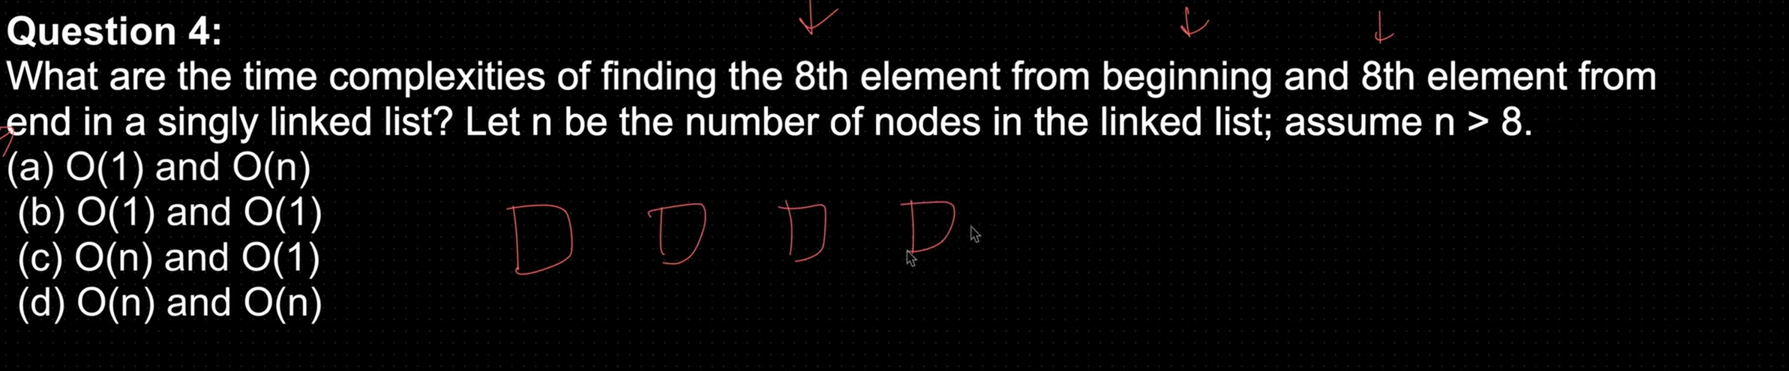

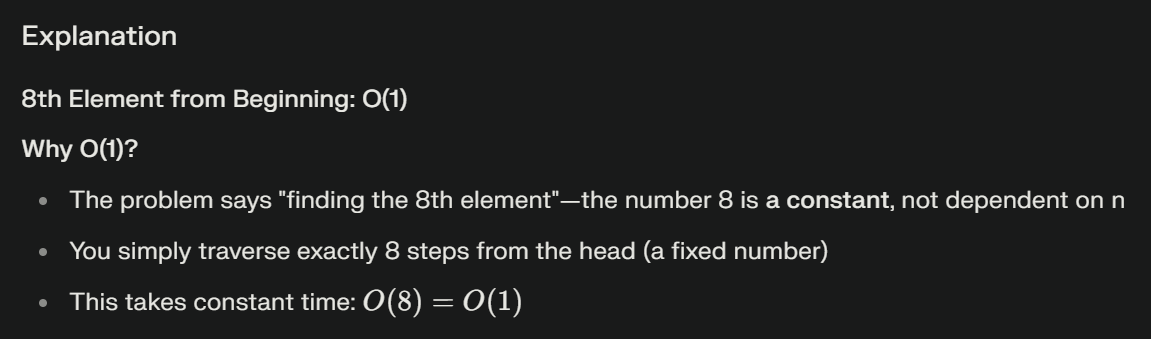

In [9]:
def find_8th_from_beginning(head):
    """Find 8th element from beginning - O(1)"""
    curr = head
    for _ in range(7):  # 7 steps to reach 8th position (0-indexed: position 7)
        if not curr:
            return None
        curr = curr.next
    return curr.val if curr else None

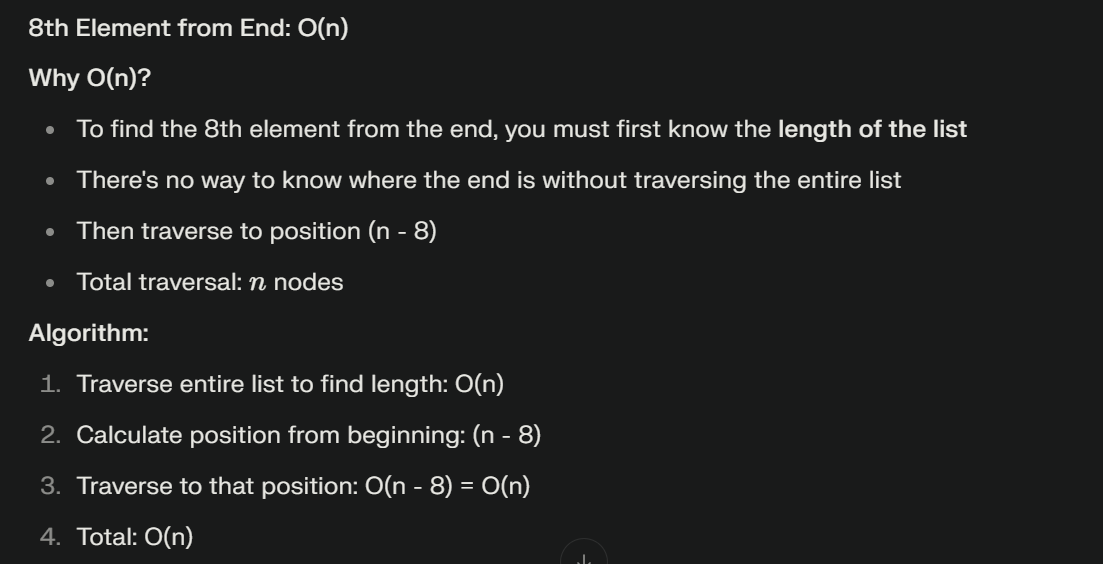

In [10]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next


def print_list(head, list_name="List"):
    """Print a linked list"""
    values = []
    curr = head
    while curr:
        values.append(curr.val)
        curr = curr.next
    print(f"{list_name}: {' -> '.join(map(str, values))} -> None")


def get_list_length(head):
    """Get length of linked list - O(n)"""
    length = 0
    curr = head
    while curr:
        length += 1
        curr = curr.next
    return length


def find_8th_from_beginning(head, show_steps=True):
    """
    Find 8th element from beginning
    Time Complexity: O(1) - constant number of steps (8)
    Space Complexity: O(1)
    """
    if show_steps:
        print("\n" + "─" * 70)
        print("FINDING 8TH ELEMENT FROM BEGINNING")
        print("─" * 70)
    
    step = 0
    curr = head
    
    # Traverse exactly 7 steps to reach 8th position (0-indexed: position 7)
    for _ in range(7):
        if not curr:
            if show_steps:
                print(f"  ✗ List has fewer than 8 elements")
            return None
        
        step += 1
        if show_steps:
            print(f"  Step {step}: Current value = {curr.val}")
        curr = curr.next
    
    if curr:
        if show_steps:
            print(f"\n  ✓ 8th element from beginning: {curr.val}")
            print(f"  Total steps: 8 (constant)")
            print(f"  Time Complexity: O(1)")
        return curr.val
    else:
        if show_steps:
            print(f"  ✗ List has fewer than 8 elements")
        return None


def find_8th_from_end(head, show_steps=True):
    """
    Find 8th element from end
    Time Complexity: O(n) - must traverse entire list to find length
    Space Complexity: O(1)
    """
    if show_steps:
        print("\n" + "─" * 70)
        print("FINDING 8TH ELEMENT FROM END")
        print("─" * 70)
    
    # Step 1: Find length of list
    length = get_list_length(head)
    if show_steps:
        print(f"  Step 1: Traverse entire list to find length = {length}")
    
    # Step 2: Calculate position from beginning
    pos_from_beginning = length - 8
    if pos_from_beginning < 0:
        if show_steps:
            print(f"  ✗ List has fewer than 8 elements")
        return None
    
    if show_steps:
        print(f"  Step 2: Calculate position from beginning = {length} - 8 = {pos_from_beginning}")
    
    # Step 3: Traverse to that position
    curr = head
    for i in range(pos_from_beginning):
        if show_steps:
            print(f"  Step 3.{i+1}: Traverse to position {i+1}")
        curr = curr.next
    
    if curr:
        if show_steps:
            print(f"\n  ✓ 8th element from end: {curr.val}")
            print(f"  Total steps: {length} (entire traversal)")
            print(f"  Time Complexity: O(n)")
        return curr.val
    else:
        if show_steps:
            print(f"  ✗ Error in traversal")
        return None


def find_8th_from_end_two_pointer(head, show_steps=True):
    """
    Optimized: Find 8th element from end using two-pointer technique
    Time Complexity: O(n) but only single pass
    Space Complexity: O(1)
    """
    if show_steps:
        print("\n" + "─" * 70)
        print("FINDING 8TH ELEMENT FROM END (Two-Pointer Optimized)")
        print("─" * 70)
    
    # Create two pointers 8 steps apart
    ptr1 = head
    ptr2 = head
    
    # Move ptr1 8 steps ahead
    for i in range(8):
        if not ptr1:
            if show_steps:
                print(f"  ✗ List has fewer than 8 elements")
            return None
        ptr1 = ptr1.next
    
    if show_steps:
        print(f"  Step 1: Move first pointer 8 steps ahead")
    
    # Move both pointers until ptr1 reaches end
    step = 1
    while ptr1:
        step += 1
        ptr1 = ptr1.next
        ptr2 = ptr2.next
        if show_steps and step % 5 == 0:
            print(f"  Step {step}: Both pointers moved")
    
    if ptr2:
        if show_steps:
            print(f"\n  ✓ 8th element from end: {ptr2.val}")
            print(f"  Total steps: {step}")
            print(f"  Time Complexity: O(n) - single pass")
        return ptr2.val
    else:
        if show_steps:
            print(f"  ✗ Error in traversal")
        return None


# ===== TEST CASES =====

if __name__ == "__main__":
    print("=" * 70)
    print("FINDING 8TH ELEMENT FROM BEGINNING AND END")
    print("=" * 70)
    
    # Create a linked list: 1 -> 2 -> 3 -> ... -> 15
    head = ListNode(1)
    curr = head
    for i in range(2, 16):
        curr.next = ListNode(i)
        curr = curr.next
    
    print("\nLinked List created:")
    print_list(head)
    length = get_list_length(head)
    print(f"\nList length (n) = {length}")
    
    
    # ===== FIND 8TH FROM BEGINNING =====
    result_begin = find_8th_from_beginning(head, show_steps=True)
    
    
    # ===== FIND 8TH FROM END =====
    result_end = find_8th_from_end(head, show_steps=True)
    
    
    # ===== ALTERNATIVE: TWO-POINTER =====
    result_end_optimized = find_8th_from_end_two_pointer(head, show_steps=False)
    
    
    # ===== SUMMARY =====
    print("\n\n" + "=" * 70)
    print("ANALYSIS SUMMARY")
    print("=" * 70)
    
    print(f"\nList: 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> ... -> 15")
    print(f"\n8th element from beginning (index 7): {result_begin}")
    print(f"  Complexity: O(1) - constant 8 steps")
    
    print(f"\n8th element from end (index {length - 8}): {result_end}")
    print(f"  Complexity: O(n) - need to traverse entire list")
    
    
    # ===== COMPARISON TABLE =====
    print("\n\n" + "─" * 70)
    print("TIME COMPLEXITY COMPARISON")
    print("─" * 70)
    
    print(f"\n{'Operation':<35} {'Complexity':<20} {'Reason':<30}")
    print("─" * 85)
    print(f"{'8th from beginning (fixed k=8)':<35} {'O(1)':<20} {'Constant steps':<30}")
    print(f"{'8th from end':<35} {'O(n)':<20} {'Need full length':<30}")
    print(f"{'kth from beginning (k constant)':<35} {'O(1)':<20} {'Constant steps':<30}")
    print(f"{'kth from end (k constant)':<35} {'O(n)':<20} {'Need full length':<30}")
    print(f"{'nth from beginning (depends on n)':<35} {'O(n)':<20} {'Variable steps':<30}")
    print(f"{'nth from end (depends on n)':<35} {'O(n)':<20} {'Variable steps':<30}")
    
    
    # ===== ANSWER =====
    print("\n\n" + "=" * 70)
    print("FINAL ANSWER")
    print("=" * 70)
    print("\n✓ ANSWER: (a) O(1) and O(n)")
    print("\nExplanation:")
    print("  • 8th from beginning: O(1) because 8 is a constant (fixed number of steps)")
    print("  • 8th from end: O(n) because you must traverse entire list to find length")
    print("=" * 70 + "\n")


FINDING 8TH ELEMENT FROM BEGINNING AND END

Linked List created:
List: 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14 -> 15 -> None

List length (n) = 15

──────────────────────────────────────────────────────────────────────
FINDING 8TH ELEMENT FROM BEGINNING
──────────────────────────────────────────────────────────────────────
  Step 1: Current value = 1
  Step 2: Current value = 2
  Step 3: Current value = 3
  Step 4: Current value = 4
  Step 5: Current value = 5
  Step 6: Current value = 6
  Step 7: Current value = 7

  ✓ 8th element from beginning: 8
  Total steps: 8 (constant)
  Time Complexity: O(1)

──────────────────────────────────────────────────────────────────────
FINDING 8TH ELEMENT FROM END
──────────────────────────────────────────────────────────────────────
  Step 1: Traverse entire list to find length = 15
  Step 2: Calculate position from beginning = 15 - 8 = 7
  Step 3.1: Traverse to position 1
  Step 3.2: Traverse to position 2
  Step 3.3